In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/bbc-text.csv")


In [2]:
df.head()
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [3]:
df.isnull().sum()

,0
category,0
text,0


In [4]:
df.duplicated().sum()

np.int64(99)

In [5]:
df['category'].value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


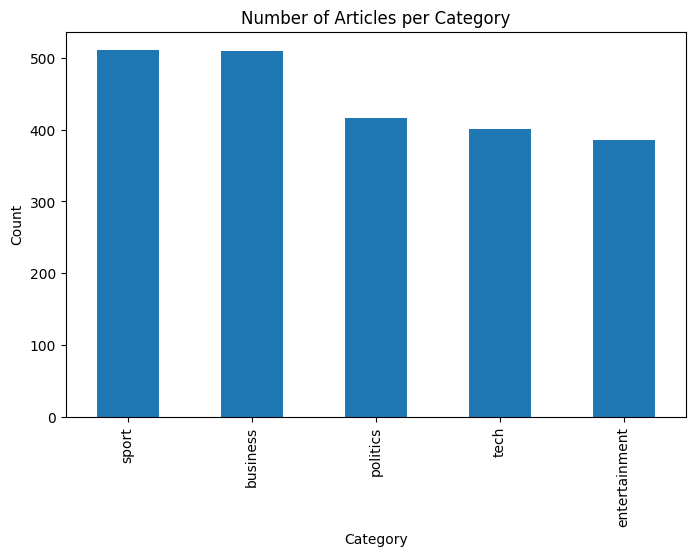

In [6]:
plt.figure(figsize=(8,5))
df['category'].value_counts().plot(kind='bar')
plt.title("Number of Articles per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [7]:
df['char_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df[['char_length', 'word_count']].describe()


,char_length,word_count
count,2225.00000,2225.000000
mean,2262.93618,390.295281
std,1364.10253,241.753128
min,501.00000,90.000000
25%,1446.00000,250.000000
50%,1965.00000,337.000000
75%,2802.00000,479.000000
max,25483.00000,4492.000000


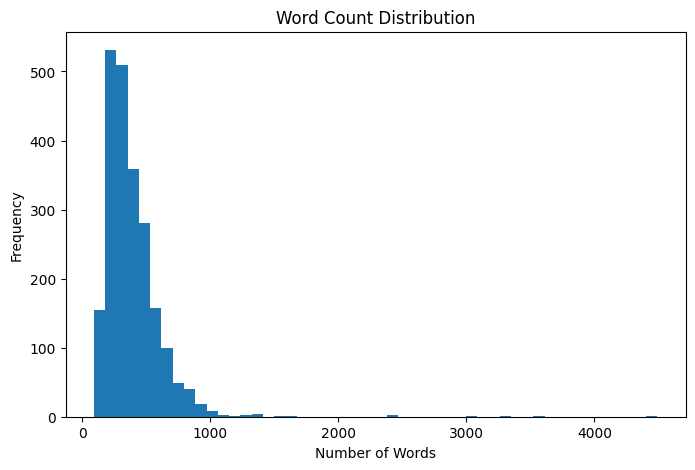

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df['word_count'], bins=50)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


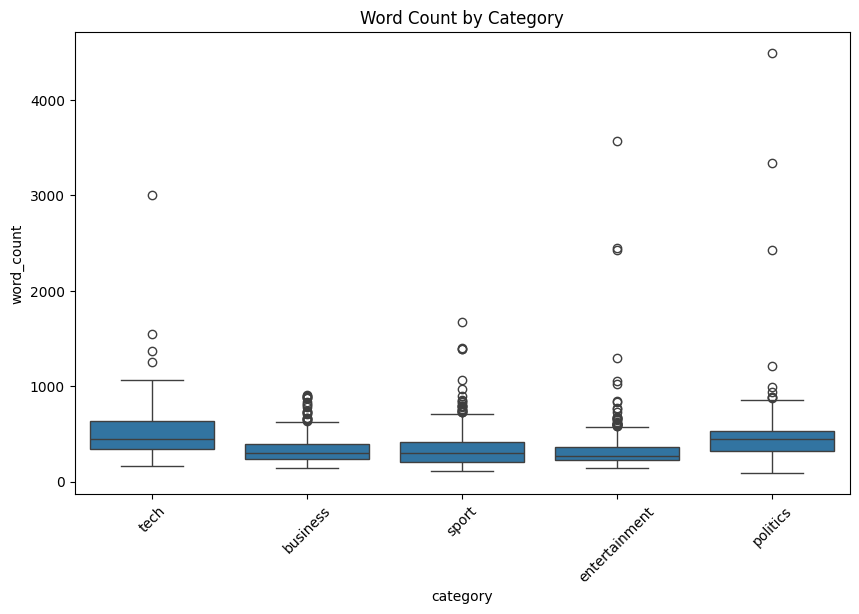

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='word_count', data=df)
plt.xticks(rotation=45)
plt.title("Word Count by Category")
plt.show()


In [10]:
for cat in df['category'].unique():
    print(f"\nCategory: {cat}")
    print(df[df['category'] == cat]['text'].iloc[0][:500], "...\n")



Category: tech
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via h ...


Category: business
worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has 

In [11]:
df['text'] = df['text'].str.lower()
df = df[df['word_count'] > 50]


In [12]:
df.columns


Index(['category', 'text', 'char_length', 'word_count'], dtype='object')

In [13]:
sample_df = df.sample(n=20, random_state=42)


In [15]:
sample_df.to_csv("bbc_news_sample.csv", index=False)
